In [3]:
import pandas as pd
import matplotlib.pyplot as plt

totals = pd.DataFrame()

df = pd.read_csv("SC-EST2020-AGESEX-CIV.csv")
df = df.drop(columns=["SUMLEV", "REGION", "SEX", "DIVISION", "STATE", "ESTBASE2010_CIV"], axis = 1)

#Only take in values above 15 (adults)
df = df.loc[df['AGE'] > 15]
df = df.loc[df['AGE'] < 999]
df = df.drop(columns=["AGE"], axis = 1)

#Add up population for each age within range
for state in df["NAME"].unique():
    totals[state] = (df.loc[df["NAME"] == state].sum(axis = 0)).drop("NAME")
    
totals.index = totals.index.str.strip("POPEST").str.strip("_CIV") 


In [4]:
print(totals)

     United States  Alabama   Alaska   Arizona Arkansas California Colorado  \
2010     485317134  7546006  1050050   9880528  4566684   58009982  7842042   
2011     490060974  7583224  1071064  10032594  4604206   58684460  7977050   
2012     494732426  7624602  1083504  10197680  4627510   59355754  8110642   
2013     499161680  7666292  1091392  10350264  4647012   59996904  8252488   
2014     503834724  7701084  1095498  10539836  4668160   60681854  8405200   
2015     508525672  7733216  1099470  10736186  4694130   61322162  8595092   
2016     513293668  7766650  1107636  10953318  4721524   61873286  8773174   
2017     517619452  7798118  1107432  11161060  4745914   62319954  8920072   
2018     521263260  7823448  1106178  11386566  4765346   62632818  9079452   
2019     524703290  7857816  1104914  11631858  4786928   62797646  9219158   
2020     527655712  7887868  1103382  11887912  4810280   62847628  9335708   

     Connecticut Delaware District of Columbia  ...

In [9]:
state_prop = pd.DataFrame()

state_prop = totals.divide(totals["United States"], axis=0).iloc[:,1:]


In [10]:
print(state_prop)

        Alabama      Alaska    Arizona    Arkansas California   Colorado  \
2010  0.0155486  0.00216364  0.0203589  0.00940969    0.11953  0.0161586   
2011   0.015474  0.00218557  0.0204721  0.00939517   0.119749  0.0162777   
2012  0.0154116  0.00219008  0.0206125  0.00935356   0.119975   0.016394   
2013  0.0153583  0.00218645  0.0207353  0.00930963   0.120195  0.0165327   
2014  0.0152849  0.00217432  0.0209192  0.00926526    0.12044  0.0166825   
2015  0.0152071  0.00216207  0.0211124  0.00923086   0.120588   0.016902   
2016   0.015131   0.0021579  0.0213393  0.00919848   0.120542  0.0170919   
2017  0.0150653  0.00213947  0.0215623  0.00916873   0.120397  0.0172329   
2018  0.0150086  0.00212211  0.0218442  0.00914192   0.120156  0.0174182   
2019  0.0149757  0.00210579  0.0221684  0.00912311   0.119682  0.0175702   
2020  0.0149489   0.0020911  0.0225297  0.00911632   0.119107  0.0176928   

     Connecticut    Delaware District of Columbia    Florida  ...  \
2010   0.0117788  

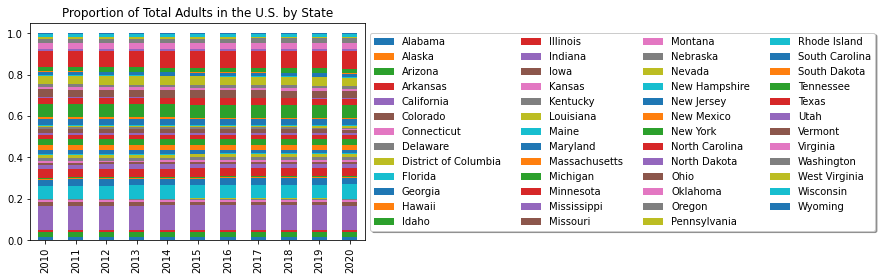

In [11]:
state_prop.plot(kind='bar', stacked=True,
        title='Proportion of Total Adults in the U.S. by State').legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=4)

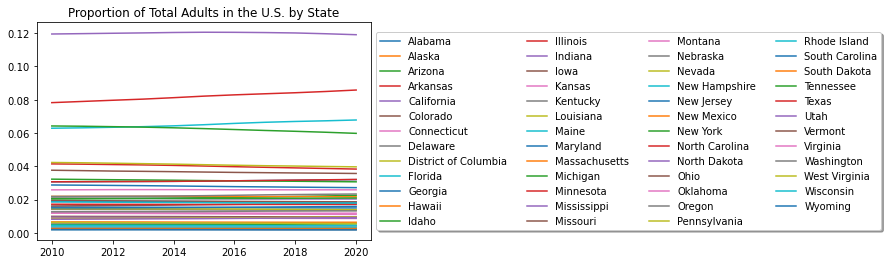

In [12]:
state_prop.plot(title='Proportion of Total Adults in the U.S. by State').legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True, ncol=4)

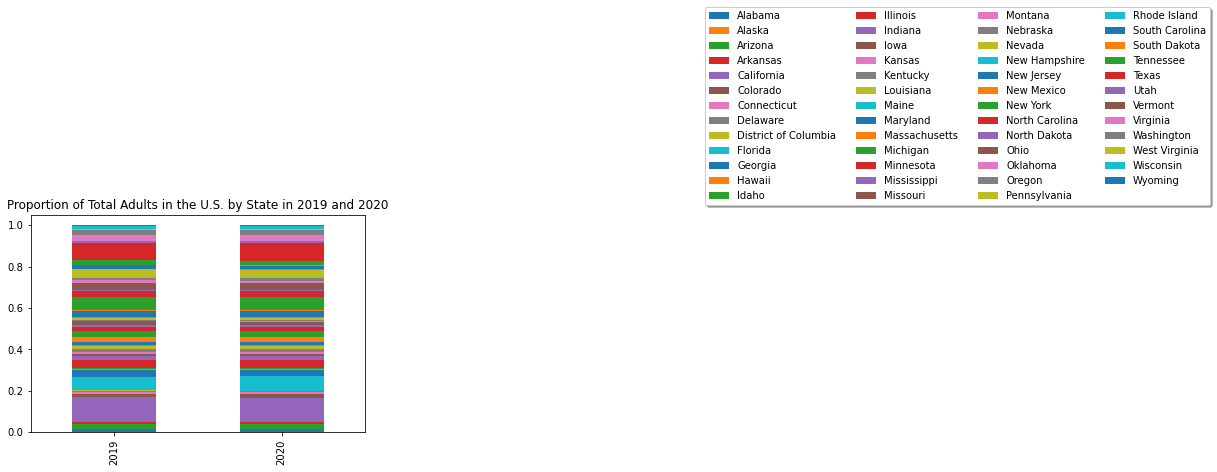

In [15]:
current = state_prop.iloc[9:]
current.plot(kind='bar', stacked=True,
        title='Proportion of Total Adults in the U.S. by State in 2019 and 2020').legend(loc='center left', bbox_to_anchor=(2, 1.5), fancybox=True, shadow=True, ncol=4)


In [14]:
print(current.transpose())

                            2019        2020
Alabama                0.0149757   0.0149489
Alaska                0.00210579   0.0020911
Arizona                0.0221684   0.0225297
Arkansas              0.00912311  0.00911632
California              0.119682    0.119107
Colorado               0.0175702   0.0176928
Connecticut            0.0111415   0.0110747
Delaware              0.00301986  0.00304093
District of Columbia  0.00223688  0.00223558
Florida                0.0673477   0.0678336
Georgia                0.0318238   0.0319869
Hawaii                0.00419711  0.00415565
Idaho                 0.00529211  0.00540078
Illinois               0.0386956   0.0383261
Indiana                0.0203486   0.0203419
Iowa                  0.00957339  0.00954691
Kansas                0.00864303  0.00861941
Kentucky               0.0135853    0.013541
Louisiana              0.0139936   0.0138986
Maine                  0.0042889  0.00428765
Maryland               0.0184143   0.0183337
Massachuse